<a href="https://colab.research.google.com/github/iceaiai/CS-team/blob/main/tutorial/September_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1 Outline


*   What is an image?
*   Gaussian distribution
*   2D Gaussian kernal and blurring
*   Loading data in Hyperspy


# What is an image?
# An image can be viewed as a 2D array of numbers.
# 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
# 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0
# 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0
# 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0
# 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0
# 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0
# 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0
# What is the letter here?

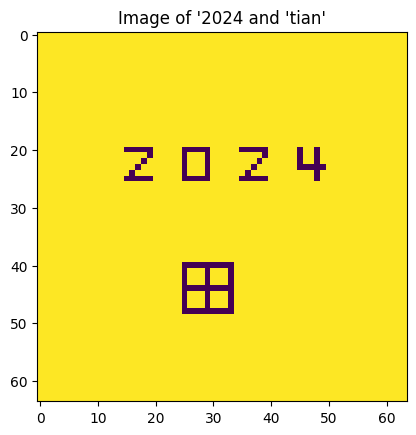

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Math
from scipy.ndimage import convolve
import requests
from PIL import Image
from io import BytesIO

image_size = (64, 64)
img_array = np.ones(image_size)

# Function for drawing
def draw_number(img, number_array, loc):
  # img: 2-D arrays for drawing 64x64
  # number_array: input 2-D array 5x5 or 10x10
    for i, row in enumerate(number_array):
        for j, pixel in enumerate(row):
            if pixel == 1:
                img[loc[0] + i, loc[1] + j] = 0  #drop the '1' at the designated postions


number_2 = np.array([[1, 1, 1, 1, 1],
           [0, 0, 0, 0, 1],
           [0, 0, 0, 1, 0],
           [0, 0, 1, 0, 0],
           [0, 1, 0, 0, 0],
           [1, 1, 1, 1, 1],
           [0, 0, 0, 0, 0]])

number_0 = np.array([[1, 1, 1, 1, 1],
           [1, 0, 0, 0, 1],
           [1, 0, 0, 0, 1],
           [1, 0, 0, 0, 1],
           [1, 0, 0, 0, 1],
           [1, 1, 1, 1, 1],
           [0, 0, 0, 0, 0]])

number_4 = np.array([[1, 0, 0, 1, 0],
            [1, 0, 0, 1, 0],
            [1, 0, 0, 1, 0],
            [1, 1, 1, 1, 1],
            [0, 0, 0, 1, 0],
            [0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0]])
letter_tian = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1]])


draw_number(img_array, number_2, (20, 15))
draw_number(img_array, number_0, (20, 25))
draw_number(img_array, number_2, (20, 35))
draw_number(img_array, number_4, (20, 45))
draw_number(img_array, letter_tian, (40, 25))

# Display the image
plt.imshow(img_array)
plt.title("Image of '2024 and 'tian'")
plt.show()


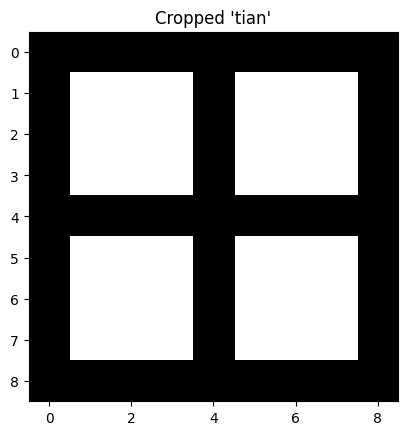

In [ ]:
cropped_tian = img_array[40:49, 25:34]  # Adjust the cropping region as needed

# Display the cropped "田"
plt.imshow(cropped_tian, cmap='gray')
plt.title("Cropped 'tian'")
plt.show()

# Gaussian distribution
$$
f(x) = a \cdot e^{-\frac{{(x - \mu)^2}}{{2\sigma^2}}}
$$
## a : Height
## σ : Standard deviation (width)
## μ : Peak position

# 1D Gaussian
$$
f(x) = a \cdot e^{-\frac{{(x - \mu)^2}}{{2\sigma^2}}}
$$

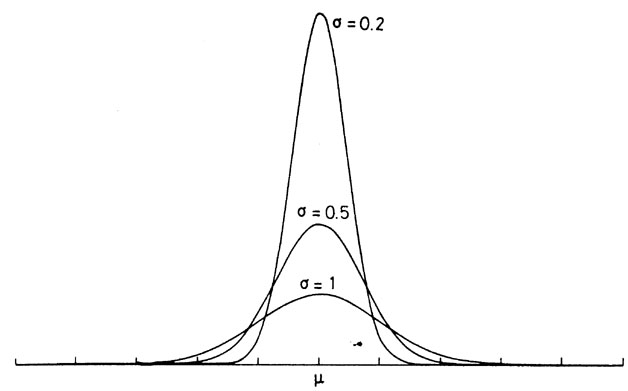

In [ ]:
gaussian_eq = r'''
f(x) = a \cdot e^{-\frac{{(x - \mu)^2}}{{2\sigma^2}}}
'''
display(Math(gaussian_eq))


def gaussian(x, height, mu, sigma):
    return height * np.exp(-((x - mu)**2) / (2 * sigma**2))

def update_plot(height, mu, sigma):
    x = np.linspace(-10, 10, 400)
    y = gaussian(x, height, mu, sigma)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.title(f"Gaussian Curve: $\mu={mu}, \sigma={sigma}, a={height}$")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.show()

# Create interactive widgets for height, mean (mu), and sigma
height_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Height (a)')
mu_slider = widgets.FloatSlider(value=0, min=-5, max=6, step=0.1, description='Mean (μ)')
sigma_slider = widgets.FloatSlider(value=1, min=0.1, max=7, step=0.1, description='Sigma (σ)')

# Display the widgets and the plot
ui = widgets.VBox([height_slider, mu_slider, sigma_slider])
out = widgets.interactive_output(update_plot, {'height': height_slider, 'mu': mu_slider, 'sigma': sigma_slider})

display(ui, out)


<IPython.core.display.Math object>

Output()

# 3D Gaussian
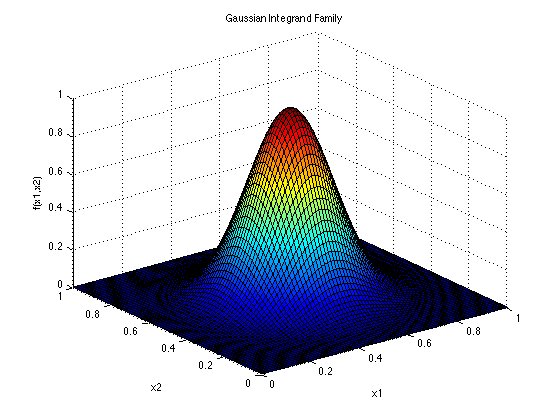

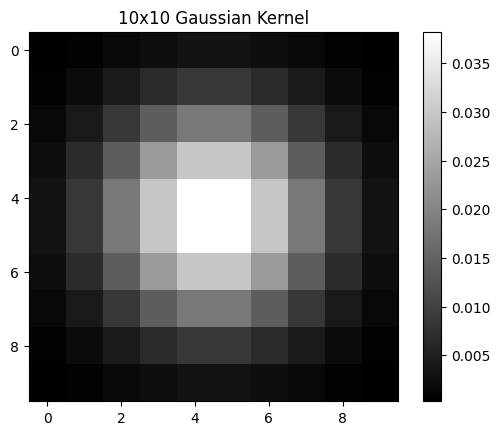

In [ ]:
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)


gaussian_kernel_10 = gaussian_kernel(10, sigma=2)
plt.imshow(gaussian_kernel_10, cmap='gray')
plt.title("10x10 Gaussian Kernel")
plt.colorbar()
plt.show()


# Electron prob is just like a 3D-gaussian peak
1. FIB: 10-100nm probel size
2. SEM: 1-10nm probe size
3. AC corrected STEM 0.04-0.1nm probe size
4. Diameter of atom: 0.1-0.5nm
5. Length of DNA ~30nm
6. Length of Covid-19: 100nm
7. Length of human hair: 10,000-200,000nm


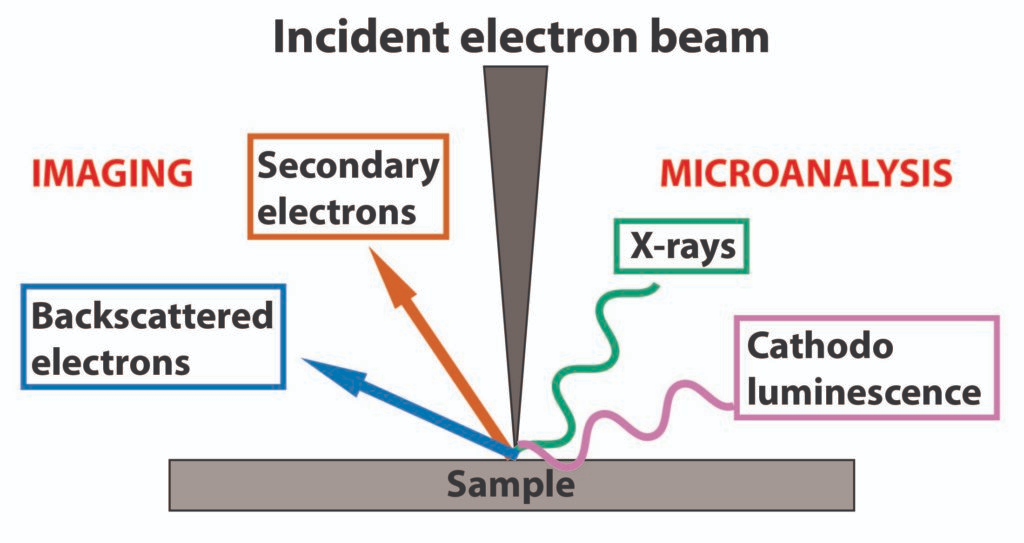

In [ ]:
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)
def update_plot(size, sigma):
    kernel = gaussian_kernel(size, sigma)
    plt.figure(figsize=(6, 6))
    plt.imshow(kernel, cmap='gray')
    plt.title(f"{size}x{size} Gaussian Kernel (σ={sigma})")
    plt.colorbar()
    plt.show()

size_slider = widgets.IntSlider(value=50, min=1, max=100, step=1, description='Pixel Size:')
sigma_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='Sigma:')
ui = widgets.VBox([size_slider, sigma_slider])
out = widgets.interactive_output(update_plot, {'size': size_slider, 'sigma': sigma_slider})
display(ui, out)

Output()

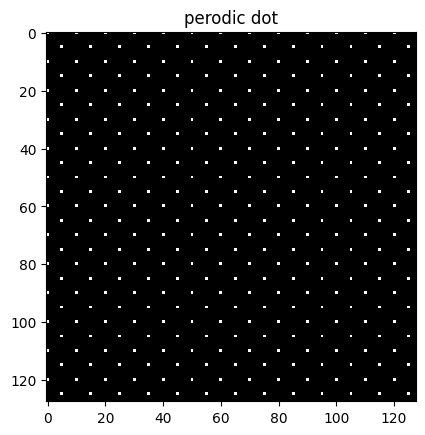

In [ ]:
def generate_fcc_image(size=128, separation=10):
    """Generate a 2D image of FCC phase atoms with single pixel dots"""
    image = np.zeros((size, size))

    # FCC structure - Atoms at corners and center of faces in 2D projection
    for x in range(0, size, separation):
        for y in range(0, size, separation):
            # Add atom at corner (single pixel dot)
            image[x, y] = 1
            # Add atom at the center of the 'face' (single pixel dot)
            if x + separation // 2 < size and y + separation // 2 < size:
                image[x + separation // 2, y + separation // 2] = 1

    return image

fcc_image = generate_fcc_image(size=128, separation=10)
plt.imshow(fcc_image, cmap='gray', interpolation='none')
plt.title("perodic dot")
plt.show()


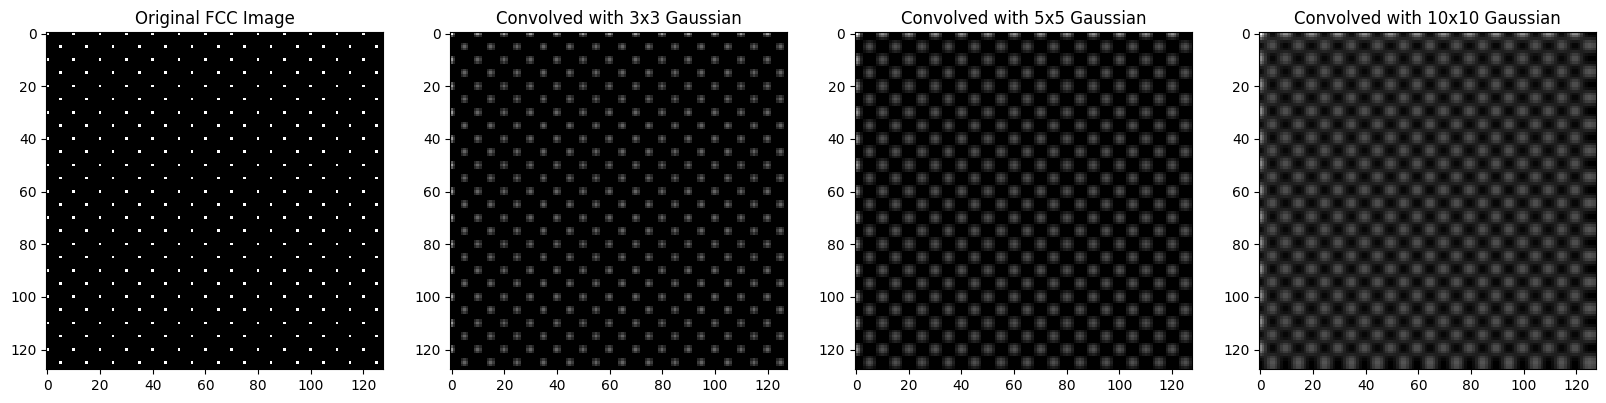

In [ ]:
def gaussian_kernel(size, sigma=1):
    """Generate a Gaussian kernel."""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

def generate_fcc_image(size=128, separation=10):
    """Generate a 2D image of FCC phase atoms with single pixel dots"""
    image = np.zeros((size, size))

    # FCC structure - Atoms at corners and center of faces in 2D projection
    for x in range(0, size, separation):
        for y in range(0, size, separation):
            # Add atom at corner (single pixel dot)
            image[x, y] = 1
            # Add atom at the center of the 'face' (single pixel dot)
            if x + separation // 2 < size and y + separation // 2 < size:
                image[x + separation // 2, y + separation // 2] = 1

    return image

# Generate the FCC image
fcc_image = generate_fcc_image(size=128, separation=10)

# Create Gaussian kernels with varying sizes
gaussian_3x3 = gaussian_kernel(3, sigma=1)
gaussian_5x5 = gaussian_kernel(5, sigma=1.5)
gaussian_10x10 = gaussian_kernel(10, sigma=2)

# Convolve the FCC image with each Gaussian kernel
convolved_3x3 = convolve(fcc_image, gaussian_3x3)
convolved_5x5 = convolve(fcc_image, gaussian_5x5)
convolved_10x10 = convolve(fcc_image, gaussian_10x10)

# Plot the original FCC image and convolved results
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(fcc_image, cmap='gray', interpolation='none')
ax[0].set_title('Original FCC Image')

ax[1].imshow(convolved_3x3, cmap='gray', interpolation='none')
ax[1].set_title('Convolved with 3x3 Gaussian')

ax[2].imshow(convolved_5x5, cmap='gray', interpolation='none')
ax[2].set_title('Convolved with 5x5 Gaussian')

ax[3].imshow(convolved_10x10, cmap='gray', interpolation='none')
ax[3].set_title('Convolved with 10x10 Gaussian')

plt.show()


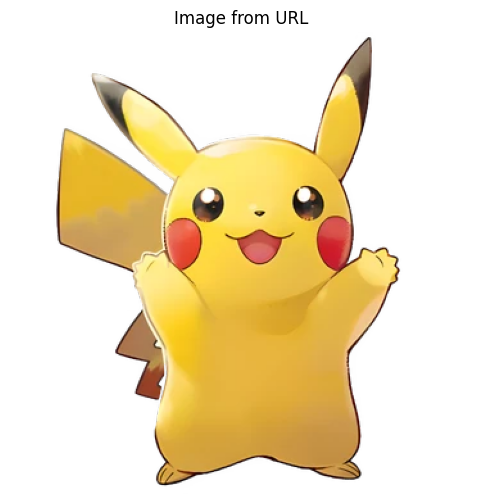

In [ ]:
url = 'https://github.com/iceaiai/CS-team/blob/fc0683819e7023983addfd53b3f80cbe54a50b0d/tutorial/image.png?raw=true'
response = requests.get(url)
pikachu_img = Image.open(BytesIO(response.content))
# Display the image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(pikachu_img)
plt.axis('off')  # Hide axes
plt.title('Image from URL')
plt.show()


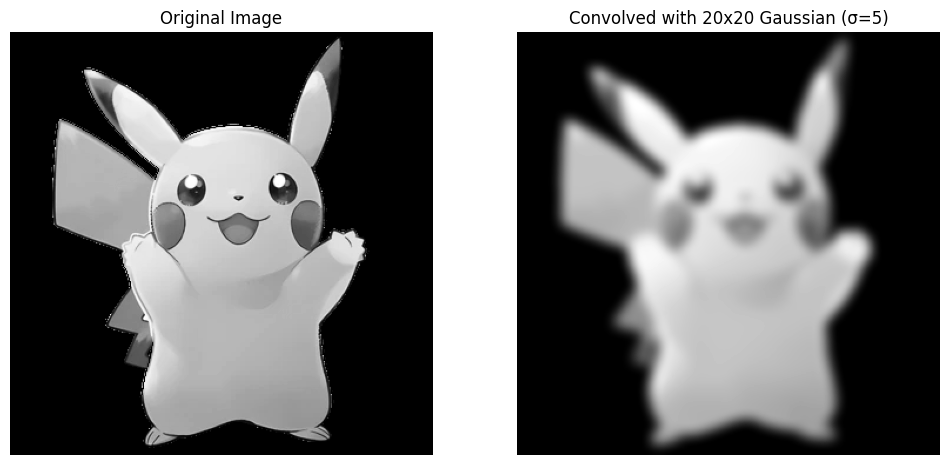

In [ ]:
image = pikachu_img.convert('L')  # Convert to grayscale
image_np = np.array(image)

# Function to generate a Gaussian kernel
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)
size = 20
sigma = 5
kernel = gaussian_kernel(size, sigma)

# Convolve the image with the kernel
convolved_image = convolve(image_np, kernel)
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Convolved image
plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title(f"Convolved with {size}x{size} Gaussian (σ={sigma})")
plt.axis('off')

plt.show()


# Hyperspy will be the major library to process the EDS, NBED, S/ST/TEM data
## Website :https://hyperspy.org/
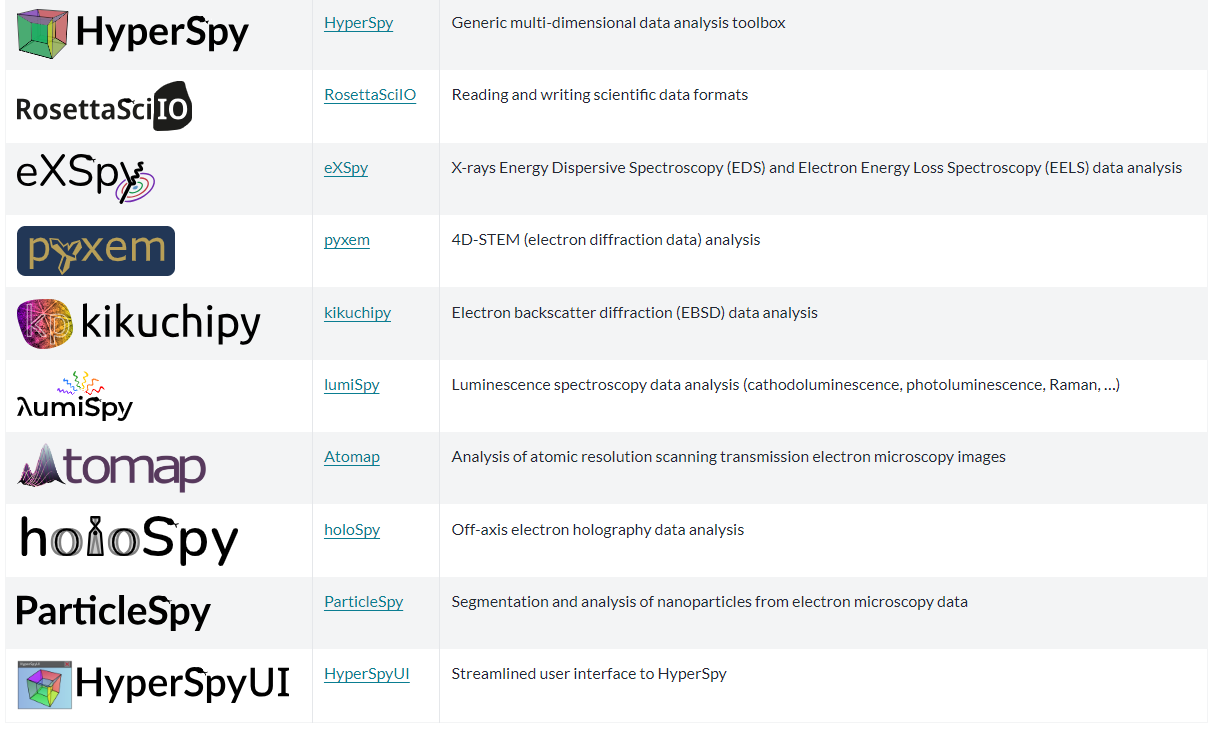


In [ ]:
!pip install hyperspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.2/976.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.7 MB/s eta 0:00:00


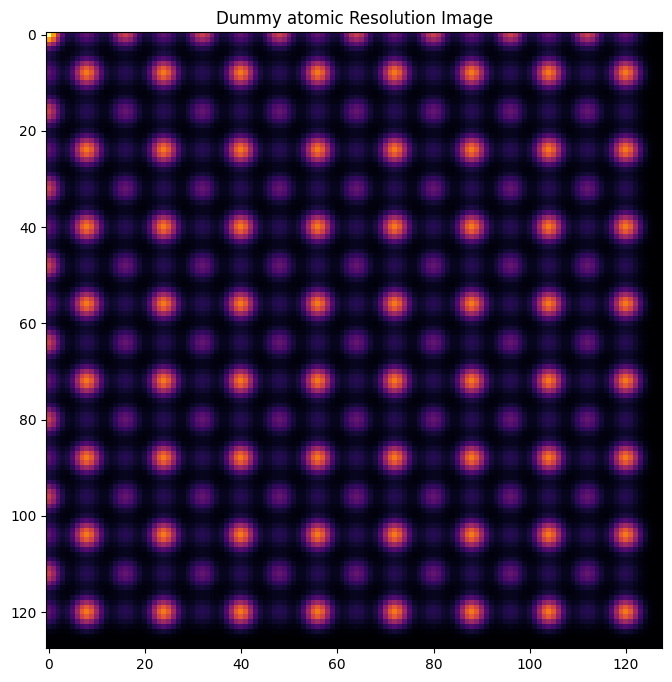

In [ ]:
# First create a dummy atomic resolutio STEM image
from scipy.ndimage import gaussian_filter
# Parameters
image_size = 128  #
n = 16  # Separation between atoms in pixels
#m = 10  # Diameter of atoms in pixels
sigma = 2
intensity = 1
#image[[(i, j) for i in range(8, image_size, n) for j in range(8, image_size, n)]] = height
image = np.zeros((image_size, image_size))
# Plot the dummy atomic STEM image
def draw_atoms(image, n, height):
    for i in range(int(n/2), image_size, int(n)):  # Start at half of n for symmetry
        for j in range(int(n/2), image_size, int(n)):
          # A atom positions
          image[i, j] = height
          # B atom positions
          image[int((i+n//2)%image_size),int((j+n//2)%image_size)] = height*0.4
          # C atom positions
          image[int((i+n//2)%image_size),j] = height*0.2
          image[i,int((j+n//2)%image_size)] = height*0.2
draw_atoms(image,n,intensity)

# Apply Gaussian filter for atomic decay with tunable sigma
blurred_image = gaussian_filter(image, sigma=sigma)

# Plot the result
plt.figure(figsize=(8, 8))
plt.imshow(blurred_image, cmap='inferno', interpolation='nearest')
plt.title(f'Dummy atomic Resolution Image')
plt.savefig('dummy_image.png')
plt.show()

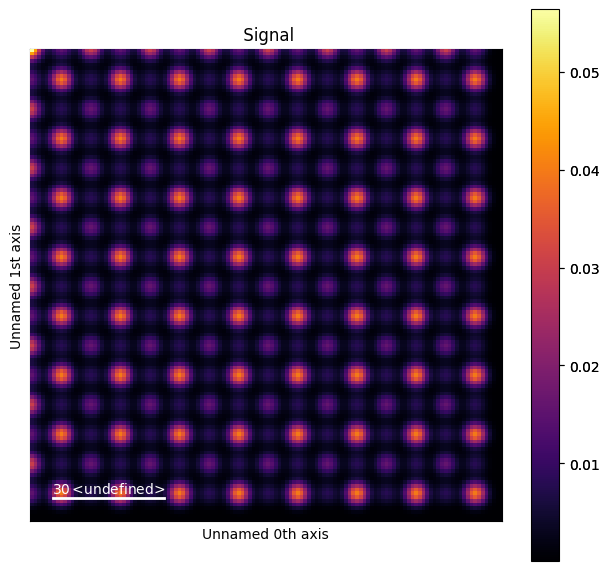

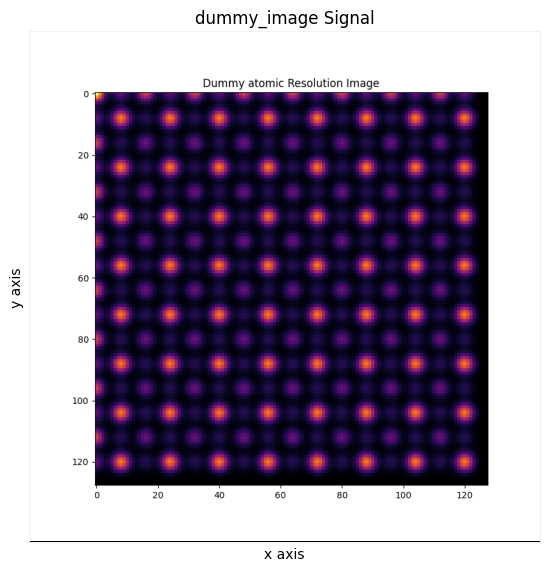

In [ ]:
import hyperspy.api as hs
img = hs.signals.Signal2D(blurred_image)
img.plot(cmap = 'inferno')
s = hs.load('dummy_image.png')
s.plot()

In [ ]:
#Check the signal type and dimension
img

<Signal2D, title: , dimensions: (|128, 128)>

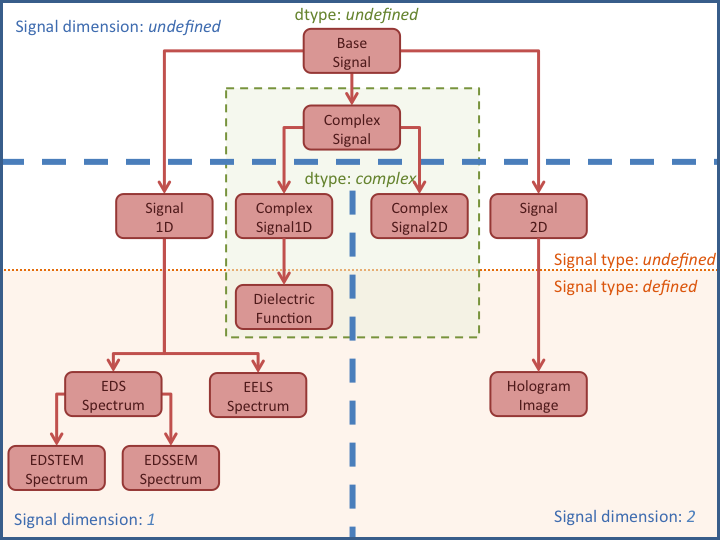

In [ ]:
img.metadata

├── General
│   └── title = 
└── Signal
    └── signal_type =

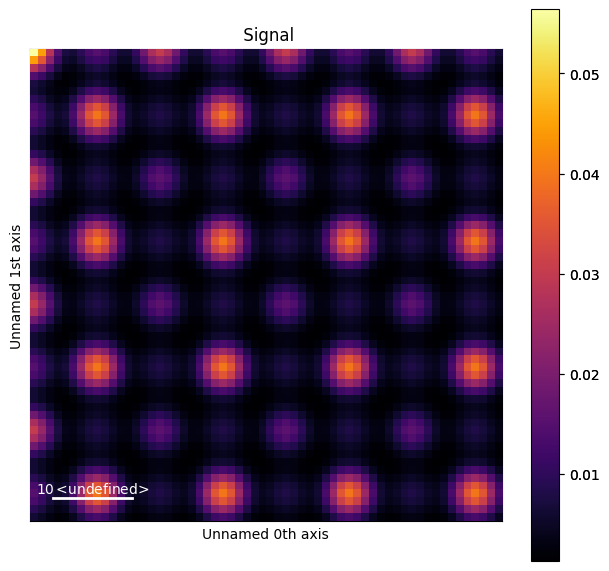

In [ ]:
#crop the image
s_crop = img.isig[:60,0:60]
s_crop.plot(cmap = 'inferno')

In [ ]:
# Check the image size, calibration etc.
img.axes_manager

Signal axis name,size,,offset,scale,units
,128,,0.0,1.0,
,128,,0.0,1.0,


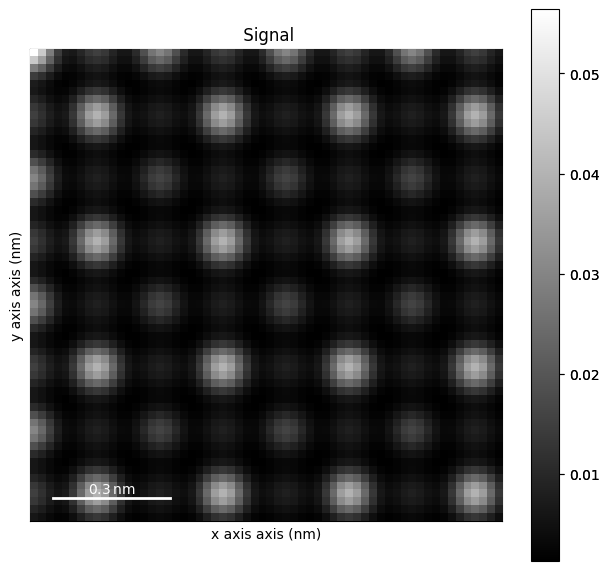

In [ ]:
# set the parameters
s_crop.axes_manager[0].name = 'x axis'
s_crop.axes_manager[1].name = 'y axis'
s_crop.axes_manager[0].scale = 0.0202
s_crop.axes_manager[1].scale = 0.0202
s_crop.axes_manager[0].units = 'nm'
s_crop.axes_manager[1].units = 'nm'
s_crop.plot()

In [ ]:
s_crop.axes_manager

Signal axis name,size,,offset,scale,units
x axis,60,,0.0,0.0202,nm
y axis,60,,0.0,0.0202,nm


In [ ]:
# Access to the data
s_crop.data

array([[0.05641328, 0.0446509 , 0.02806909, ..., 0.01329798, 0.00942738,
        0.00618449],
       [0.0446509 , 0.03534116, 0.02221734, ..., 0.01058604, 0.00750348,
        0.00491735],
       [0.02806909, 0.02221734, 0.0139704 , ..., 0.00696234, 0.00492835,
        0.00320437],
       ...,
       [0.01329798, 0.01058604, 0.00696234, ..., 0.03101939, 0.02138709,
        0.01171581],
       [0.00942738, 0.00750348, 0.00492835, ..., 0.02138709, 0.01474718,
        0.00808369],
       [0.00618449, 0.00491735, 0.00320437, ..., 0.01171581, 0.00808369,
        0.0044516 ]])

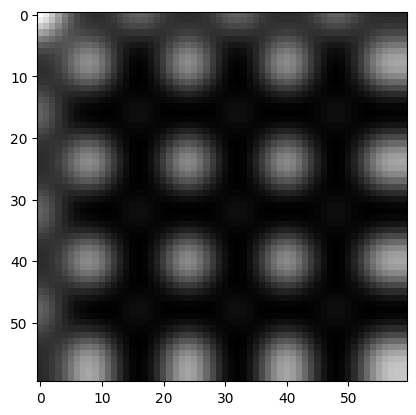

In [ ]:
# You can play with the data i.e. do gaussian blurring
gaussian_15x15 = gaussian_kernel(15, sigma=3) #change sigma to create STEM image at different resolution
convolved_data = convolve(s_crop.data, gaussian_15x15)
plt.imshow(convolved_data,cmap = 'gray')
plt.show()

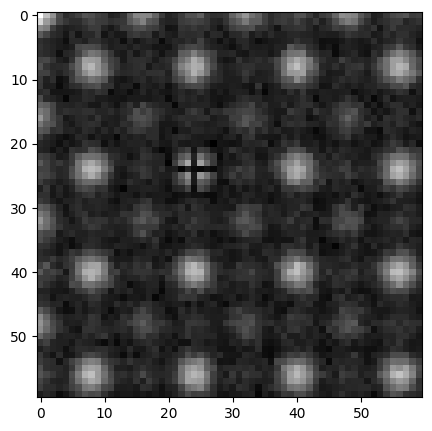

In [ ]:
# Or you can add some random noise
noise = np.random.normal(loc=0, scale=0.002, size=s_crop.data.shape)
plt.figure(figsize=(5, 5))
random_noisy_data = s_crop.data + noise
plt.imshow(random_noisy_data,cmap = 'gray')
plt.show()

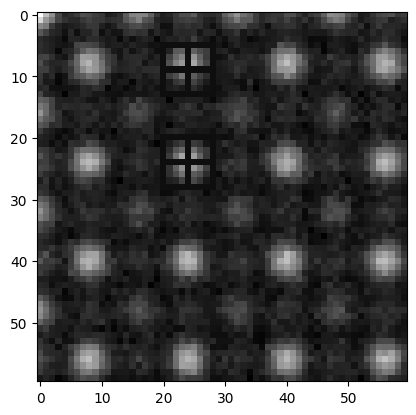

In [ ]:
# Or any overlays
draw_number(random_noisy_data, letter_tian, (20, 20))
draw_number(random_noisy_data, letter_tian, (5, 20))
plt.imshow(random_noisy_data,cmap = 'gray')
plt.show()